# Exercicios de Interpolação

In [24]:
def resolvePoli(c,x):
    y = 0;
    for i in range(len(c)):
        y+=(c[i])*(x**i)
    return y


def resolveTS(A,b): #A Triangular Superior
    x= np.zeros(len(A))
    for i in range(len(A)-1, -1,-1):
        x[i]=(b[i]-(A[i,i+1:]*x[i+1:]).sum())/A[i,i]
    return x


def resolveTI(A,b): #A Triangular Inferior
    m = len(A)
    n = len(A[0])
    k=0
    x = np.zeros(n)
    for i in range(0,m):
        k=0
        for j in range(0,n-1):
            k = A[i][j]* x[j]
        x[i] = (b[i]-k)/A[i][i]
    return x


def LUparcial(A):
    P = np.eye(len(A))
    L = np.eye(len(A))
    i = 0
    for i in range(0,len(A)-1):
        im = np.argmax(abs(A[i:,i])) + i
        pivo = A[im][i]
        for j in range(i,len(A)):        
            m = A[j][i] / pivo
            if j != im: 
                A[j] = A[j] - A[im] * m
                if j < im: 
                    L[j+1][i] = m
                else: 
                    L[j][i] = m
    
        A[[i,im]]=A[[im,i]]
        P[[i,im]]=P[[im,i]]
    U = A
    return L, U, P

def resolveLUpar(L,U,P,b): 
    t = resolveTI(L,np.dot(P,b))
    x = resolveTS(U, t)
    return x
  
  
  
def eliminacaoGaussianaSimples(A,b):
    pivot = 0
    m = 0.0
    x = np.zeros(len(A))
    for i in range(0,len(A)-1):
        pivot = A[i,i]
        for j in range(i+1,len(A)):
            if (pivot == 0):
                m = 0
            else:
                m = A[j,i]/pivot
            A[j] =  A[j] - (m*A[i])
            b[j] = b[j] - (m*b[i])       
    x = resolveTS(A,b)
    return x




In [115]:
def escolheIntervalo(x,y,xalvo,n):
    dif = [abs (v-xalvo) for v in x]
    a = b = np.argmin([abs (v-xalvo) for v in x])
    while (b-a < n):
        if(a==0):
            b += 1
        elif(b == len(x)-1):
            a -= 1
        elif (dif[b+1]< dif[a-1]):
            b += 1
        else:
            a -= 1
    return x[a:b], y[a:b]

In [116]:
def interpoli(x,y):
    m = np.eye(len(x))
    t = len(x)-1
    for i in range(len(x)-1, -1,-1):
        m [:,i] = x**t
        t-= 1
    L, U, P = LUparcial(m)
    #print(U)
    return resolveLUpar(L,U,P,y)

In [117]:
def lagranged(x,y,xalvo):
    c = d = 1
    yalvo = 0
    for i in range(len(x)):
        for j in range(len(x)):
            if (i!=j):
                c = c *(xalvo-x[j])
                d = d *(x[i]-x[j])
        yalvo += y[i]* (c/d)
    return yalvo



def lagrange(x,y,xalvo):
    yalvo = 0
    for i in range(len(x)):
        for j in range(len(x)):
            if (i!=j):
                yalvo += (y[i]*((xalvo-x[j])/(x[i]-x[j])))
    return yalvo

In [179]:
def difdiv(x,y):
    d = np.zeros(len(x))
    t = 0
    dd = np.eye(len(x))
    while(t < len(y)):
        d[t] = y[t]
        t+=1
    for i in range(len(x)-1):
        for j in range(len(x)-1, -1, -1):
            dd[i,j] = (d[i]-d[i-1])/((x[j] -x[j-i]))
    return dd

def poliNewton(x,y,d,xalvo):
    m = len(x)
    r = d[m]
    for i in range(1,len(x)):
        r = r * (xalvo-x[i] + dd[i])
    return y

### Exercicio 1 ###

Nos dados abaixo está o número de habitantes de manaus entre 1950 e 2000, como em sala de aula

Compute:
    - Com 3 pontos o número de habitantes de Manaus em 1958 e 1988.
    - Com 4 pontos o número de habitantes em 1958 e 1988.
    
Qual foi a diferença entre os dois resultados?

In [181]:
import numpy as np

ano = np.array([1950,1960,1970,1980,1991,2000])

populacao = np.array([139620,173706,311622,633392,1011500,1403796])

In [183]:
ano1, pol1 = escolheIntervalo(ano,populacao,1958,3)

lagrange(ano1,pol1,1958)

1295441.4

In [184]:
ano1, pol1 = escolheIntervalo(ano,populacao,1988,3)

lagrange(ano2,pol2,1988)

5499919.731601732

In [186]:
ano1, pol1 = escolheIntervalo(ano,populacao,1958,4)

lagrange(ano3,pol3,1958)

1178456.0

In [185]:
ano1, pol1 = escolheIntervalo(ano,populacao,1988,4)

lagrange(ano3,pol3,1988)

2331340.9999999995

### Exercicio 2

Dada a função $f(x)=10x^{4}+2x+1$, determine a interpolação de dois pontos $P_2(0.15)$ e $P_2(0.25)$ usando para interpolar os pontos f(0,1), f(0,2) e f(0.3).

- Pelo método de interpolação polinomial
- Pelo Polinômio de Lagrange


Qual o erro absoluto e relativo de cada método? Quanto tempo cada um leva para calcular os dois pontos?

In [141]:
def f0(x):
    return 10*(x**4)+2*x +1

In [142]:
x = np.array([0.1,0.2,0.3])
y = np.array([f0(0.1),f0(0.2),f0(0.3)])


print("Tempo do Interpolacao:")
%timeit -n1 interpoli(x,y)
coef = interpoli(x,y)
print("\n")

print("Tempo do ResolvePoli:")
%timeit -n1 resolvePoli(coef,0.15)
p1 = resolvePoli(coef,0.15)

print("\n")
print(p1)

Tempo do Interpolacao:
883 µs ± 376 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tempo do ResolvePoli:
The slowest run took 5.60 times longer than the fastest. This could mean that an intermediate result is being cached.
15.6 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


2.0528749999999993


In [143]:
x = np.array([0.1,0.2,0.3])
y = np.array([f0(0.1),f0(0.2),f0(0.3)])


print("Tempo do Interpolacao:")
%timeit -n1 interpoli(x,y)
coef = interpoli(x,y)

print("\n")

print("Tempo do ResolvePoli:")
%timeit -n1 resolvePoli(coef,0.25)

p2 = resolvePoli(coef,0.25)
print("\n")
print(p2)

Tempo do Interpolacao:
1.21 ms ± 287 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tempo do ResolvePoli:
13 µs ± 8.46 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


2.893375


In [144]:
x = np.array([0.1,0.2,0.3])
y = np.array([f0(0.1),f0(0.2),f0(0.3)])


print("Tempo do lagrange:")
%timeit -n1 lagrange(x,y,0.15)
l1 = lagrange(x,y,0.15)
print(l1)

Tempo do lagrange:
24.6 µs ± 7.55 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.9129999999999994


In [145]:
x = np.array([0.1,0.2,0.3])
y = np.array([f0(0.1),f0(0.2),f0(0.3)])


print("Tempo do lagrange:")
%timeit -n1 lagrange(x,y,0.25)
l2 = lagrange(x,y,0.25)
print(l2)

Tempo do lagrange:
26.3 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.632999999999999


In [146]:
def erro(x,p):
    ea = 0
    er = 0
    cont = 0
    for i in range(len(x)):
        ea += x[i]-p
        cont += 1
    er = (ea/p)*100
    return ea, er


print("Erro Relativo e Absoluto da Interpoacao Polinomial, do ponto 0.15, respectivamente:")
p = erro(x,p1)
l = erro(x,l1)
print(p,l)
print("\n")


print("Erro Relativo e Absoluto da Interpoacao Polinomial, do ponto 0.25, respectivamente:")
pp = erro(x,p2)
ll = erro(x,l2)
print(pp,ll)
print("\n")


Erro Relativo e Absoluto da Interpoacao Polinomial, do ponto 0.15, respectivamente:
(-5.558624999999998, -270.7726968276198) (-11.138999999999998, -284.66649629440326)


Erro Relativo e Absoluto da Interpoacao Polinomial, do ponto 0.25, respectivamente:
(-8.080124999999999, -279.2629714433836) (-13.298999999999996, -287.049428016404)




In [129]:
print("Erro Relativo e Absoluto da Polinomio de Lagrange, respectivamente:")
erro(x,L)

Erro Relativo e Absoluto da Polinomio de Lagrange, respectivamente:


(-2.243125, -44.14695149452622)

### Exercicio 3

Dada a função $f(x)=sen(x)+2x+1$, determine $L_2(0,15)$ e $L_3(0,15)$ usando os valores $f(0,1),f(0,2),f(0,3)$ e $f(0,4)$, usando o polinomio de lagrange.

Plote a função no intervalo [0,0.5] e os pontos computados

In [130]:
def f1(x):
    return np.sin(x) + 2*x + 1

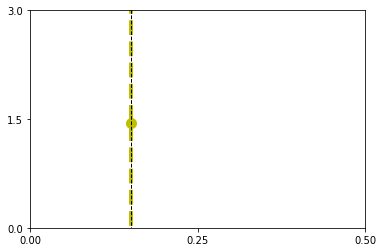

In [178]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.1,0.2,0.3,0.4])


xe1, ye1 = escolheIntervalo(x,f1(x),0.15,2)
xe2, ye2 = escolheIntervalo(x,f1(x),0.15,3)


yl1 = lagrange(xe1,ye1,0.15)
yl2 = lagrange(xe2,ye2,0.15)


plt.xticks(np.linspace(0,0.5,3))
plt.yticks(np.linspace(0,3,3))
plt.xlim(0,0.5)
plt.ylim(0,3)

plt.scatter([0.15,], yl1, 100, color ='y')
plt.plot([0.15,0.15],[yl2,0], color ='y', linewidth=4, linestyle="--")


plt.scatter([0.15,],yl2, 15, color ='black')
plt.plot([0.15,0.15],[yl2, 0], color ='black', linewidth=1, linestyle="--")

plt.show()

### Exercício 4 ###

1 - Na célula abaixo, são dados os números de óbitos em hospitais em Manaus. Como pode ser visto, os dados referentes à 2008 e a 2011 estão faltando. Use a interpolação polinomial com 2,3 e 5 pontos para estimar estes pontos.

2 - Plote as curvas dos polinômios gerados (em dois gráficos), de forma similar ao feito no notebook em sala de aula

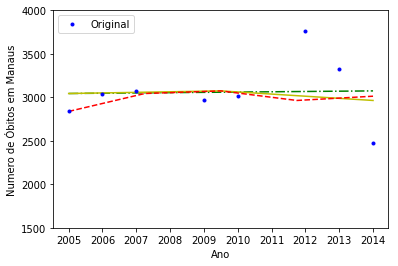

In [150]:
import numpy as np
import matplotlib.pyplot as plt

xmorte = np.array([2005,2006,2007,2009,2010,2012,2013,2014])
ymorte = np.array([2838,3044,3074,2964,3013,3759,3323,2471])

xplot1 = np.linspace(2005,2014,2)
xplot2 = np.linspace(2005,2014,3)
xplot3 = np.linspace(2005,2014,5)

x08_1, y08_1 = escolheIntervalo(xmorte,ymorte,2008,2)
x08_2, y08_2 = escolheIntervalo(xmorte,ymorte,2008,3)
x08_3, y08_3 = escolheIntervalo(xmorte,ymorte,2008,5)



c08_1 = interpoli(x08_1,y08_1)
c08_2 = interpoli(x08_2,y08_2)
c08_3 = interpoli(x08_3,y08_3)


yp08_1 = resolvePoli(c08_1,xplot1)
yp08_2 = resolvePoli(c08_2,xplot2)
yp08_3 = resolvePoli(c08_3,xplot3)



plt.plot(xplot1, y08_1,'g-.')
plt.plot(xplot2, y08_2,'y-')
plt.plot(xplot3, y08_3,'r--')
plt.plot(xmorte,ymorte,'b.',label='Original')
plt.ylabel('Numero de Óbitos em Manaus')
plt.xlabel('Ano')
plt.ylim(1500,4000)
plt.xticks([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.legend(loc='upper left')
plt.show()

Faça um gráfico com o tempo de execução das três para diferentes valores de N, para mostrar em que ponto o Polinomial e o Newton são mais vantajosos que o Lagrange: